In [1]:
import numpy as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt
import matplotlib         as mpl

from scipy import stats
from mpl_toolkits.mplot3d import Axes3D

from invisible_cities.io import mcinfo_io as mio
from invisible_cities.io   .dst_io  import load_dst

from next_sparseconvnet.data_io_scripts.plotting_utils import plot_projections, plot_3d_vox, plot_3d_hits
from next_sparseconvnet.utils.data_loaders import read_event, read_events_info

In [2]:
original_dataset = '/home/mmkekic/MC_dataset/new_data/valid_dataset.h5'
prediction_dataset1 = '/home/mperez/DNN_training/predictions/pred_file1.h5' #no se pq no tiene datos??? creo q simplemente fue un intento parado
prediction_dataset2 = '/home/mperez/DNN_training/predictions/pred_file2.h5'
prediction_dataset3 = '/home/mperez/DNN_training/predictions/pred_file3.h5'
prediction_dataset4 = '/home/mperez/DNN_training/predictions/pred_file4.h5'
pred_dataset_fl = '/home/mperez/DNN_training/predictions/1mm/focal_loss/pred_file9_1mm_fl.h5'

In [3]:
with tb.open_file(original_dataset) as h5in:
    print(h5in)

/home/mmkekic/MC_dataset/new_data/valid_dataset.h5 (File) ''
Last modif.: 'Thu May 13 12:02:55 2021'
Object Tree: 
/ (RootGroup) ''
/DATASET (Group) ''
/DATASET/BinsInfo (Table(1,), shuffle, zlib(4)) ''
/DATASET/EventsInfo (Table(32272,), shuffle, zlib(4)) ''
/DATASET/Voxels (Table(6334747,), shuffle, zlib(4)) ''



In [4]:
df = load_dst(original_dataset, 'DATASET', 'Voxels')

In [5]:
df

,xbin,ybin,zbin,energy,segclass,binclass,dataset_id
0,207,312,337,0.009156,1,0,0
1,204,307,335,0.008509,2,0,0
2,204,307,336,0.127435,2,0,0
3,204,308,335,0.011514,1,0,0
4,204,309,334,0.006156,1,0,0
...,...,...,...,...,...,...,...
6334742,46,217,472,0.034489,1,0,32271
6334743,107,206,440,0.003373,1,0,32271
6334744,107,206,439,0.004809,1,0,32271
6334745,88,208,484,0.003381,1,0,32271


In [6]:
df.loc[2180] #2180 era el q mire siempre (y 2000 el q mire para evento de fondo)

xbin          258.000000
ybin          302.000000
zbin          216.000000
energy          0.004461
segclass        1.000000
binclass        0.000000
dataset_id     10.000000
Name: 2180, dtype: float64

In [7]:
df_particles = mio.load_mcparticles_df('/home/gdiaz/data_for_marija/tlde_nn/nexus/nexus_2006_tlde.h5')

In [8]:
df_hits = mio.load_mchits_df('/home/gdiaz/data_for_marija/tlde_nn/nexus/nexus_2006_tlde.h5')

In [9]:
unique_part = np.unique(df_hits.loc[2006000282].index.get_level_values('particle_id'))
unique_part

array([35, 36, 37, 38, 39, 40, 41, 42])

In [10]:
pd.set_option('display.max_rows', 200)
df_particles.loc[2006000282][['particle_name', 'mother_id', 'initial_x', 'final_x', 'initial_y', 'final_y', 'initial_z', 'final_z',  'kin_energy', 'creator_proc']]

,particle_name,mother_id,initial_x,final_x,initial_y,final_y,initial_z,final_z,kin_energy,creator_proc
particle_id,,,,,,,,,,
1,Tl208,0,1.136530,1.136530,315.957275,315.957275,277.398804,277.398804,0.000000e+00,none
4,e-,1,1.136530,1.388245,315.957275,315.108795,277.398804,277.379791,6.170692e-01,RadioactiveDecayBase
3,anti_nu_e,1,1.136530,2255.923584,315.957275,-12500.000000,277.398804,-7005.048828,9.067237e-01,RadioactiveDecayBase
2,Pb208[3475.078],1,1.136530,1.136530,315.957275,315.957275,277.398804,277.398804,9.150914e-06,RadioactiveDecayBase
6,gamma,2,1.136530,-81.828514,315.957275,540.325439,277.398804,-72.961418,2.773668e-01,RadioactiveDecayBase
13,e-,6,-81.828514,-81.828514,540.325439,540.325439,-72.961418,-72.961426,3.280000e-05,phot
12,e-,6,-81.828514,-81.828514,540.325439,540.325439,-72.961418,-72.961418,3.414000e-05,phot
11,e-,6,-81.828514,-81.828514,540.325439,540.325439,-72.961418,-72.961426,9.820000e-05,phot
10,e-,6,-81.828514,-81.828506,540.325439,540.325439,-72.961418,-72.961418,9.575000e-05,phot


In [11]:
pd.set_option('display.max_rows', 100)
df_particles.loc[2006000282].loc[unique_part][['particle_name', 'mother_id', 'initial_x', 'final_x', 'initial_y', 'final_y', 'initial_z', 'final_z',  'kin_energy', 'creator_proc']]

,particle_name,mother_id,initial_x,final_x,initial_y,final_y,initial_z,final_z,kin_energy,creator_proc
particle_id,,,,,,,,,,
35,e-,34,-66.119934,-67.399384,160.467728,162.568878,98.318665,99.183250,0.342246,conv
36,e+,34,-66.119934,-103.158272,160.467728,140.757553,98.318665,79.203232,1.250246,conv
37,Xe131,34,-66.119934,-66.119934,160.467728,160.467606,98.318665,98.318291,0.000015,conv
38,e-,36,-77.692520,-78.329483,148.079590,146.752441,84.861900,83.409851,0.141347,eIoni
39,e-,36,-103.136589,-103.136513,140.749649,140.749863,79.186890,79.187195,0.000551,eIoni
40,e-,36,-103.136589,-103.136589,140.749649,140.749542,79.186890,79.186928,0.000047,eIoni
41,e-,36,-103.136589,-103.136597,140.749649,140.749603,79.186890,79.186852,0.000047,eIoni
42,e-,36,-103.136589,-103.098190,140.749649,140.647156,79.186890,79.325508,0.038985,eIoni


eIoni es electron ionization

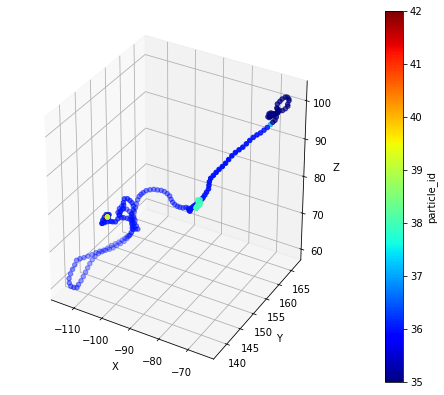

In [12]:
plot_3d_hits((df_hits.loc[2006000282]).reset_index(), value = 'particle_id')

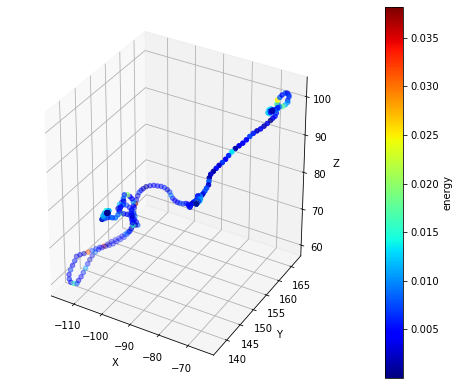

In [13]:
plot_3d_hits((df_hits.loc[2006000282]).reset_index(), value = 'energy')

In [15]:
ev = read_event(original_dataset, 2180, table='Voxels') 

In [16]:
ev

,xbin,ybin,zbin,energy,segclass,binclass,dataset_id
0,125,372,78,0.002711,1,1,2180
1,155,386,100,0.006960,1,1,2180
2,141,367,83,0.007709,0,1,2180
3,142,368,84,0.002365,1,1,2180
4,142,368,85,0.005723,1,1,2180
...,...,...,...,...,...,...,...
172,108,364,63,0.008663,1,1,2180
173,119,366,80,0.004463,1,1,2180
174,108,363,64,0.006620,1,1,2180
175,149,371,95,0.013282,1,1,2180


In [ ]:
plot_3d_vox(ev, 'Original', 2180, value = 'energy', coords = ['xbin', 'ybin', 'zbin'], th=0)

In [21]:
get_path_volume(ev, label='segclass')

,xbin,ybin,zbin,energy,segclass,binclass,dataset_id
0,125,372,78,0.002711,1,1,2180
1,155,386,100,0.006960,1,1,2180
2,141,367,83,0.007709,0,1,2180
3,142,368,84,0.002365,1,1,2180
4,142,368,85,0.005723,1,1,2180
...,...,...,...,...,...,...,...
172,108,364,63,0.008663,1,1,2180
173,119,366,80,0.004463,1,1,2180
174,108,363,64,0.006620,1,1,2180
175,149,371,95,0.013282,1,1,2180


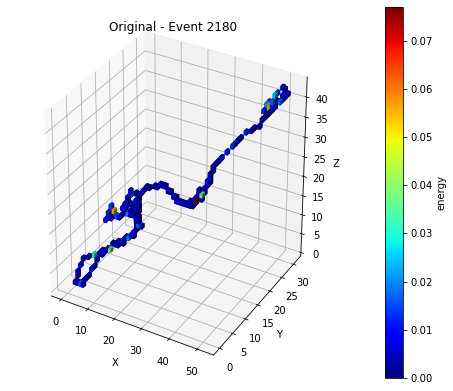

In [94]:
did = 2180
ev = read_event(original_dataset, did, table='Voxels') 
ev_shr = get_path_volume(ev, label='segclass')
plot_3d_vox(ev_shr, 'Original', did, value = 'energy', coords = ['xbin', 'ybin', 'zbin'], th=0)

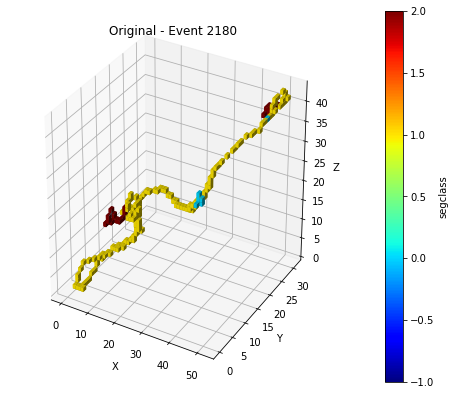

In [95]:
plot_3d_vox(ev_shr, 'Original', did, value = 'segclass', coords = ['xbin', 'ybin', 'zbin'], th=-1)

In [22]:
def plot_3d_vox(hits_digitized, type_of_event, evnum,  value='energy', coords = ['x', 'y', 'z'], th=0, edgecolor=None, cmap=mpl.cm.jet):

    xmin, xmax = hits_digitized[coords[0]].min(), hits_digitized[coords[0]].max()
    ymin, ymax = hits_digitized[coords[1]].min(), hits_digitized[coords[1]].max()
    zmin, zmax = hits_digitized[coords[2]].min(), hits_digitized[coords[2]].max()

    nbinsX = int(np.ceil((xmax-xmin))) + 2
    nbinsY = int(np.ceil((ymax-ymin))) + 2
    nbinsZ = int(np.ceil((zmax-zmin))) + 2
    xarr = np.ones(shape=(nbinsX, nbinsY, nbinsZ))*th

    nonzeros = np.vstack([hits_digitized[coords[0]].values-xmin+1,
                          hits_digitized[coords[1]].values-ymin+1,
                          hits_digitized[coords[2]].values-zmin+1])
    xarr[tuple(nonzeros)] = hits_digitized[value].values
    dim     = xarr.shape
    voxels  = xarr > th

    fig  = plt.figure(figsize=(15, 15), frameon=False)
    gs   = fig.add_gridspec(2, 40)
    ax   = fig.add_subplot(gs[0, 0:16], projection = '3d')
    axcb = fig.add_subplot(gs[0, 18])
    norm = mpl.colors.Normalize(vmin=xarr.min(), vmax=xarr.max())
    m    = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

    colors = np.asarray(np.vectorize(m.to_rgba)(xarr))
    colors = np.rollaxis(colors, 0, 4)

    ax.voxels(voxels, facecolors=colors, edgecolor=edgecolor)
    cb = mpl.colorbar.ColorbarBase(axcb, cmap=cmap, norm=norm, orientation='vertical')

    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    #ax.set_title(type_of_event + ' - Event {}'.format(evnum))
    if value == 'segclass':
        cb.set_label('Label')
    elif value == 'pred':
        cb.set_label('Prediction')
    else:
        cb.set_label (value)

    #plt.show()

In [20]:
#for voxel plotting extract the main path volume only
def get_path_volume(df, label):
    dfp = df[df[label]==1][['xbin', 'ybin', 'zbin']]
    xmin, xmax = dfp.xbin.min(), dfp.xbin.max()
    ymin, ymax = dfp.ybin.min(), dfp.ybin.max()
    zmin, zmax = dfp.zbin.min(), dfp.zbin.max()
    volum = df.xbin.between(xmin-5, xmax+5) & df.ybin.between(ymin-5, ymax+5) & df.zbin.between(zmin-5, zmax+5)
    return df[volum]

In [22]:
for dataset_id in range(100):
    original_event = read_event(original_dataset, dataset_id, table='Voxels') 
    org_shrinked = get_path_volume(original_event, label='segclass')
    
    predicted_event4 = read_event(prediction_dataset4, dataset_id, table='VoxelsPred') 
    predicted_event4 = predicted_event4.assign(pred = np.argmax(predicted_event4[['class_0', 'class_1', 'class_2']].values, axis=-1))
    pred_shrinked4 = get_path_volume(predicted_event4, label='pred')
    
    pred_fl = read_event(pred_dataset_fl, dataset_id, table='VoxelsPred') 
    pred_fl = pred_fl.assign(pred = np.argmax(pred_fl[['class_0', 'class_1', 'class_2']].values, axis=-1))
    pred_sh_fl = get_path_volume(pred_fl, label='pred')
    
    nb_orig = number_of_blobs(original_dataset, dataset_id, None, predict = False)
    nb = number_of_blobs(prediction_dataset4, dataset_id, 0.8, class_type = 'class_2', max_distance = np.sqrt(3))
    nb_fl = number_of_blobs(pred_dataset_fl,     dataset_id, 0.55, class_type = 'class_2', max_distance = np.sqrt(3))
    
    if nb_orig == 1 and nb ==2:
        print('bkg, pred as signal', dataset_id)
    elif nb_orig == 1 and nb_fl ==2:
        print('bkg, pred as signal', dataset_id)
    elif nb_orig == 2 and nb != 2:
        print('signal pred as bkg', dataset_id)
    elif nb_orig == 2 and nb_fl != 2:
        print('signal pred as bkg', dataset_id)

signal pred as bkg 5
signal pred as bkg 14
bkg, pred as signal 32
signal pred as bkg 40
signal pred as bkg 47
bkg, pred as signal 50
signal pred as bkg 69
signal pred as bkg 86
signal pred as bkg 89
bkg, pred as signal 96


In [6]:
dataset_id = 40#np.random.randint(32000)
print(dataset_id)
original_event = read_event(original_dataset, dataset_id, table='Voxels') 
org_shrinked = get_path_volume(original_event, label='segclass')

predicted_event1 = read_event(prediction_dataset1, dataset_id, table='VoxelsPred') 
predicted_event1 = predicted_event1.assign(pred = np.argmax(predicted_event1[['class_0', 'class_1', 'class_2']].values, axis=-1))
pred_shrinked1 = get_path_volume(predicted_event1, label='pred')

predicted_event2 = read_event(prediction_dataset2, dataset_id, table='VoxelsPred') 
predicted_event2 = predicted_event2.assign(pred = np.argmax(predicted_event2[['class_0', 'class_1', 'class_2']].values, axis=-1))
pred_shrinked2 = get_path_volume(predicted_event2, label='pred')

predicted_event3 = read_event(prediction_dataset3, dataset_id, table='VoxelsPred') 
predicted_event3 = predicted_event3.assign(pred = np.argmax(predicted_event3[['class_0', 'class_1', 'class_2']].values, axis=-1))
pred_shrinked3 = get_path_volume(predicted_event3, label='pred')

predicted_event4 = read_event(prediction_dataset4, dataset_id, table='VoxelsPred') 
predicted_event4 = predicted_event4.assign(pred = np.argmax(predicted_event4[['class_0', 'class_1', 'class_2']].values, axis=-1))
pred_shrinked4 = get_path_volume(predicted_event4, label='pred')


pred_fl = read_event(pred_dataset_fl, dataset_id, table='VoxelsPred') 
pred_fl = pred_fl.assign(pred = np.argmax(pred_fl[['class_0', 'class_1', 'class_2']].values, axis=-1))
pred_sh_fl = get_path_volume(pred_fl, label='pred')

40


In [14]:
th = 0.8
#hacer un number of blobs para original dataset, donde pille los voxels con class == 2 y haga lo mismo!!!
#de hecho puedo modificar number_of_blobs para que tenga opcion orignal dataset o predicted dataset...
nb_orig = number_of_blobs(original_dataset, dataset_id, None, predict = False)
nb2 = number_of_blobs(prediction_dataset2, dataset_id, th, class_type = 'class_2', max_distance = np.sqrt(3))
nb3 = number_of_blobs(prediction_dataset3, dataset_id, th, class_type = 'class_2', max_distance = np.sqrt(3))
nb4 = number_of_blobs(prediction_dataset4, dataset_id, 0.8, class_type = 'class_2', max_distance = np.sqrt(3))
nb_fl = number_of_blobs(pred_dataset_fl,     dataset_id, 0.55, class_type = 'class_2', max_distance = np.sqrt(3))

#BEST THRESHOLDS FOR EACH TRAIN...

print(nb_orig, nb2, nb3, nb4, nb_fl)

2 2 3 1 2


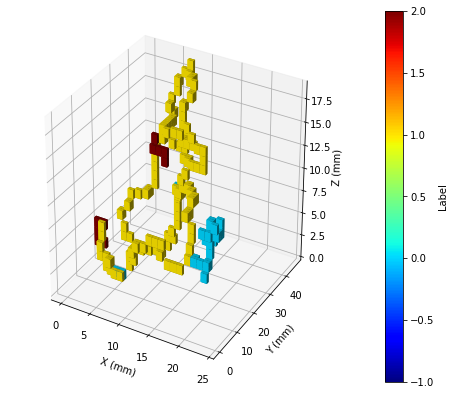

In [19]:
plot_3d_vox(org_shrinked, 'Original', dataset_id, value='segclass', coords = ['xbin', 'ybin', 'zbin'], th=-1)
#plt.suptitle('Original - Event {}'.format(dataset_id))
#plt.title('nblobs: {}'.format(nb_orig))
plt.show()

plot_3d_vox(pred_shrinked2, 'Prediction 1', dataset_id, value='pred', coords = ['xbin', 'ybin', 'zbin'], th=-1)
#plt.suptitle('Prediction 1 - Event {}'.format(dataset_id))
plt.title('nblobs: {}'.format(nb2))
plt.show()

plot_3d_vox(pred_shrinked3, 'Prediction 2', dataset_id, value='pred', coords = ['xbin', 'ybin', 'zbin'], th=-1)
#plt.suptitle('Prediction 2 - Event {}'.format(dataset_id))
plt.title('nblobs: {}'.format(nb3))
plt.show()

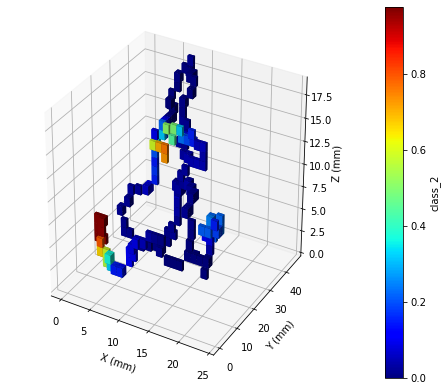

In [21]:
plot_3d_vox(pred_shrinked4, 'Prediction 3', dataset_id, value='class_2', coords = ['xbin', 'ybin', 'zbin'], th=0)
#plt.suptitle('Prediction 3 - Event {}'.format(dataset_id))
#plt.title('nblobs: {}'.format(nb4))
plt.show()

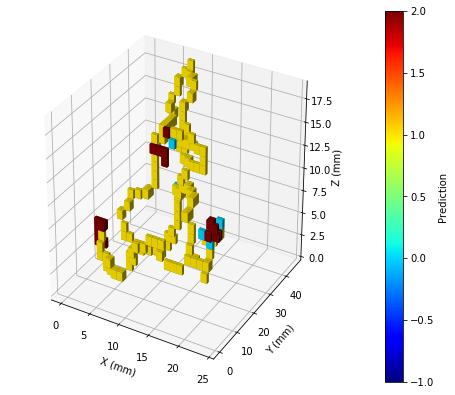

In [17]:
plot_3d_vox(pred_sh_fl, 'Prediction fl', dataset_id, value='pred', coords = ['xbin', 'ybin', 'zbin'], th=-1)
#plt.suptitle('Prediction 3 - Event {}'.format(dataset_id))
#plt.title('nblobs: {}'.format(nb_fl))
plt.show()

Ver cuantos blobs predice para cada prediccion, i guess que en esta en concreto 1 bien pero a saber!!!

Para el evento 500 visualmente se aprecia 1 blob siempre (aunque las predicciones siemrpe alargan un poco el blob....) pero con nuestra forma de contar blobs obtengo para las predicciones 8 blobs, mientras que para el evento original obtengo 6... me refiero, es justo un evento controversial porque ya lo busqué así raruno pero eso que pasan cosas, la prediccion es bte buena pero el algoritmo de blobs dice una cosa raruna...

# Create graphs

Primero voy a escoger solo los eventos con cierto threshold en class 2 y tomar sus posiciones

In [13]:
import numpy    as np
import pandas   as pd
import tables   as tb
import networkx as nx

import itertools

from next_sparseconvnet.utils.data_loaders             import DataGen, LabelType, read_event
from invisible_cities.io   .dst_io  import load_dst

In [8]:
def number_of_blobs(dataset_path, dataset_id, threshold, class_type = 'class_2', max_distance = np.sqrt(3), predict = True):
    '''
    For a prediction, returns the number of blobs for data above a threshold using graphs
    '''
    if predict == True:
        event_df = read_event(dataset_path, dataset_id, table='VoxelsPred')
        selected_hits = pd.DataFrame()
        selected_hits[['xbin', 'ybin', 'zbin']] = event_df[['xbin', 'ybin', 'zbin']][event_df[class_type]>threshold]
    else:
        event_df = read_event(dataset_path, dataset_id)
        selected_hits = pd.DataFrame()
        selected_hits[['xbin', 'ybin', 'zbin']] = event_df[['xbin', 'ybin', 'zbin']][original_event['segclass'] == 2]
        
    voxels = [tuple(x) for x in selected_hits.to_numpy()]
    vox_graph = nx.Graph()
    for va, vb in itertools.combinations(voxels, 2):
        va_arr, vb_arr = np.array(va), np.array(vb)
        dis = np.linalg.norm(va_arr-vb_arr)
        if dis < max_distance:
            vox_graph.add_edge(va, vb, distance = dis)
    nblobs = nx.algorithms.components.number_connected_components(vox_graph)
    return nblobs

In [9]:
def read_events_info(filename, nevents):
    events = load_dst(filename, 'DATASET', 'EventsInfo')
    if nevents is not None:
        if nevents>=len(events):
            warnings.warn(UserWarning(f'length of dataset smaller than {nevents}, using full dataset'))
        else:
            events = events.iloc[:nevents]
    return events

In [10]:
def segmentation_blob_classification(orig_dataset_path, pred_dataset_path, threshold, nevents = None):
    '''
    Adds a column to the events dataframe where depending on the number of blobs the predicted data had,
    events are classified as signal or background
    '''
    original_events = read_events_info(orig_dataset_path, nevents)
    original_events = original_events.assign(pred_class = original_events['dataset_id'])
    original_events.pred_class = original_events.pred_class.apply(lambda x:number_of_blobs(pred_dataset_path, x, threshold) == 2)
    original_events.pred_class = original_events.pred_class.astype(int)
    return original_events

In [11]:
def success_rates(true_class, predicted_class):
    TP, TN, FP, FN = 0, 0, 0, 0
    for i in range(len(true_class)):
        if predicted_class[i] == 1 and true_class[i] == 1:
            TP += 1
        if predicted_class[i] == 0 and true_class[i] == 0:
            TN += 1
        if predicted_class[i] == 1 and true_class[i] == 0:
            FP += 1
        if predicted_class[i] == 0 and true_class[i] == 1:
            FN += 1

    good = TP + TN
    bad = FP + FN
    total = good + bad
    accuracy = good/total
    
    tpr = TP / (TP + FN)
    fpr = FP / (FP +TN)
    tnr = 1 - fpr
    return accuracy, tpr, tnr

In [16]:
th = 0.92
new_df = segmentation_blob_classification(original_dataset, prediction_dataset4, th, nevents = 5000)
success_rates(new_df['binclass'], new_df['pred_class'])

(0.8772, 0.6574663835810333, 0.963758015054363)

In [17]:
new_df

,event_id,binclass,pathname,basename,dataset_id,pred_class
0,2000000000,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,0,0
1,2000000001,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,1,0
2,2000000002,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,2,0
3,2000000003,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,3,0
4,2000000004,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,4,0
...,...,...,...,...,...,...
95,2000000095,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,95,0
96,2000000096,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,96,0
97,2000000097,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,97,0
98,2000000098,0,/home/gdiaz/data_for_marija/tlde_nn/nexus,nexus_2000_tlde.h5,98,0


In [26]:
threshold = np.arange(0.05, 1, 0.05)
roc_curve = []
print('th acc tpr tnr')
for th in threshold:
    classified_df = segmentation_blob_classification(original_dataset, pred_dataset_fl, th) #si no poner nevents 6500 (q son como approx 1/5 de toda la validation data) y listo
    acc, tpr, tnr = success_rates(classified_df['binclass'], classified_df['pred_class'])
    roc_curve.append([tpr, tnr])
    print(th, acc, tpr, tnr)
roc_curve = np.array(roc_curve)

0.05 0.5133862171541894 0.1044858370990852 0.6733048838311997
0.1 0.5952838373822509 0.27609390499283587 0.7201172464330359
0.15000000000000002 0.6663051561725335 0.42279290201697345 0.761541445751972
0.2 0.7309432325235499 0.5449134795547228 0.8036984352773826
0.25 0.7798401090728805 0.6411330320731842 0.8340876761929393
0.3 0.8177367377293009 0.7099085197839744 0.8599077546445968
0.35000000000000003 0.8468021814576103 0.7546566736470848 0.8828397775766197
0.4 0.8716224590976698 0.7871707263308718 0.9046510625457994
0.45 0.8992935052057511 0.8245343326352915 0.9285314022156127
0.5 0.9221926127912742 0.8513170946765127 0.9499116341221604
0.55 0.927646256817055 0.8362173481759065 0.9634035949825424
0.6000000000000001 0.912772682201289 0.7661192549322164 0.9701280227596017
0.6500000000000001 0.8843889439762023 0.650060619420258 0.9760334497176603
0.7000000000000001 0.839241447694596 0.47679929461038245 0.9809905599379284
0.7500000000000001 0.7888262270699058 0.2848010580844263 0.98594767

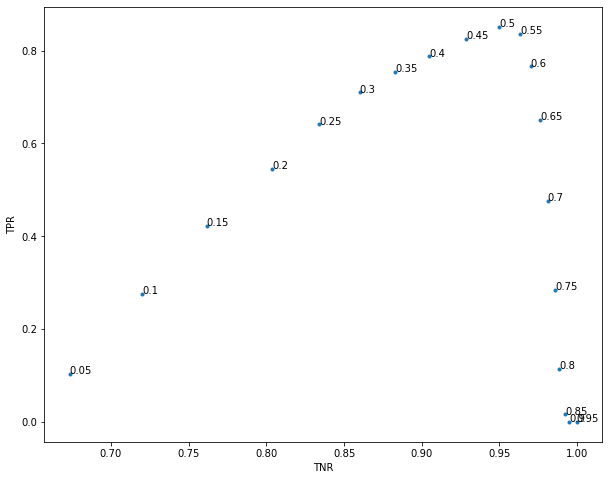

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.plot(roc_curve[:, 1], roc_curve[:, 0], '.')
plt.xlabel('TNR')
plt.ylabel('TPR')
for i, n in enumerate(threshold):
    plt.annotate(round(n, 2), (roc_curve[i, 1], roc_curve[i, 0]))
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.show()